In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load dataset
df = pd.read_csv('smoke_detection_iot.csv')

In [23]:
df.shape

(62630, 16)

In [24]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [26]:
#check for null values
pd.isnull(df).sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [27]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [28]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [29]:
# Drop missing values
df = df.dropna()

# Drop the 'Unnamed: 0' column
df = df.drop(['Unnamed: 0'], axis=1)

In [30]:
# Split dataset based on 'Fire Alarm'
smoke_detection_0 = df[df['Fire Alarm'] == 0]
smoke_detection_1 = df[df['Fire Alarm'] == 1]

[x_train_0, x_test_0, x_label_train_0, x_label_test_0] = train_test_split(smoke_detection_0, smoke_detection_0['Fire Alarm'], test_size=0.3, random_state=42, shuffle=True)
x_train_1_per = len(x_train_0) / len(smoke_detection_1)
[x_train_1, x_test_1, x_label_train_1, x_label_test_1] = train_test_split(smoke_detection_1, smoke_detection_1['Fire Alarm'], test_size=1 - x_train_1_per, random_state=42, shuffle=True)

x_train = pd.concat([x_train_0, x_train_1], axis=0)
x_test = pd.concat([x_test_0, x_test_1], axis=0)

x_train = x_train.drop(['Fire Alarm'], axis=1)
x_test = x_test.drop(['Fire Alarm'], axis=1)

x_train_label = np.array(pd.concat([x_label_train_0, x_label_train_1], axis=0))
x_test_label = np.array(pd.concat([x_label_test_0, x_label_test_1], axis=0))

In [31]:

# Initialize models
model_dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    ccp_alpha=0.01,
    random_state=42
)
model_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features='sqrt',
    ccp_alpha=0.01,
    random_state=42
)
model_nb = GaussianNB()


In [32]:
# Train models
model_dt.fit(x_train, x_train_label)
model_rf.fit(x_train, x_train_label)
model_nb.fit(x_train, x_train_label)

GaussianNB()

In [43]:
# Prediction using models
def predict(input_df):
    prediction_dt = model_dt.predict(input_df)
    prediction_rf = model_rf.predict(input_df)
    prediction_nb = model_nb.predict(input_df)
    
    # Majority vote for ensemble
    prediction = np.round((prediction_dt + prediction_rf + prediction_nb) / 3)
    prediction_proba = np.mean([model_dt.predict_proba(input_df), model_rf.predict_proba(input_df), model_nb.predict_proba(input_df)], axis=0)
    
    return prediction, prediction_proba

In [44]:
# Simulate user input for a prediction (replace with real input in actual use)
input_data = {feature: x_train[feature].mean() for feature in x_train.columns}
input_df = pd.DataFrame(input_data, index=[0])

# Model selection
model_choice = "FireGuard Ensemble"  # Replace with user's choice in actual use


In [45]:
# Show Prediction
if model_choice == "FireGuard Ensemble":
    prediction, prediction_proba = predict(input_df)
elif model_choice == "Random Forest":
    prediction = model_rf.predict(input_df)
    prediction_proba = model_rf.predict_proba(input_df)
elif model_choice == "Decision Tree":
    prediction = model_dt.predict(input_df)
    prediction_proba = model_dt.predict_proba(input_df)
elif model_choice == "Naive Bayes":
    prediction = model_nb.predict(input_df)
    prediction_proba = model_nb.predict_proba(input_df)

predicted_value = prediction[0] if isinstance(prediction, (list, np.ndarray)) else prediction

# Output the result
print(f"Prediction: {'Fire Alarm should ring!' if predicted_value == 1 else 'No need to ring the Fire Alarm.'}")
print("Prediction Probability:")
print(prediction_proba)

Prediction: Fire Alarm should ring!
Prediction Probability:
[[0.06292971 0.93707029]]


In [46]:
# Show Model Accuracy
if model_choice == "FireGuard Ensemble":
    accuracy_dt = accuracy_score(x_test_label, model_dt.predict(x_test))
    accuracy_rf = accuracy_score(x_test_label, model_rf.predict(x_test))
    accuracy_nb = accuracy_score(x_test_label, model_nb.predict(x_test))
    accuracy = np.mean([accuracy_dt, accuracy_rf, accuracy_nb])
elif model_choice == "Random Forest":
    accuracy = accuracy_score(x_test_label, model_rf.predict(x_test))
elif model_choice == "Decision Tree":
    accuracy = accuracy_score(x_test_label, model_dt.predict(x_test))
elif model_choice == "Naive Bayes":
    accuracy = accuracy_score(x_test_label, model_nb.predict(x_test))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.15%


In [47]:

# Feature Importances or Coefficients
if model_choice == "FireGuard Ensemble":
    importances_dt = model_dt.feature_importances_
    importances_rf = model_rf.feature_importances_
    importances_nb = np.abs(np.mean(model_nb.theta_, axis=0))  # Mean absolute value of Naive Bayes feature means

    # Normalize the importances so they can be averaged
    importances_dt /= np.sum(importances_dt)
    importances_rf /= np.sum(importances_rf)
    importances_nb /= np.sum(importances_nb)
    
    # Averaging the feature importances
    importances_avg = (importances_dt + importances_rf + importances_nb) / 3
    feature_importances = pd.Series(importances_avg, index=x_train.columns)
else:
    if model_choice == "Random Forest":
        feature_importances = pd.Series(model_rf.feature_importances_, index=x_train.columns)
    elif model_choice == "Decision Tree":
        feature_importances = pd.Series(model_dt.feature_importances_, index=x_train.columns)
    elif model_choice == "Naive Bayes":
        feature_importances = pd.Series(np.abs(np.mean(model_nb.theta_, axis=0)), index=x_train.columns)


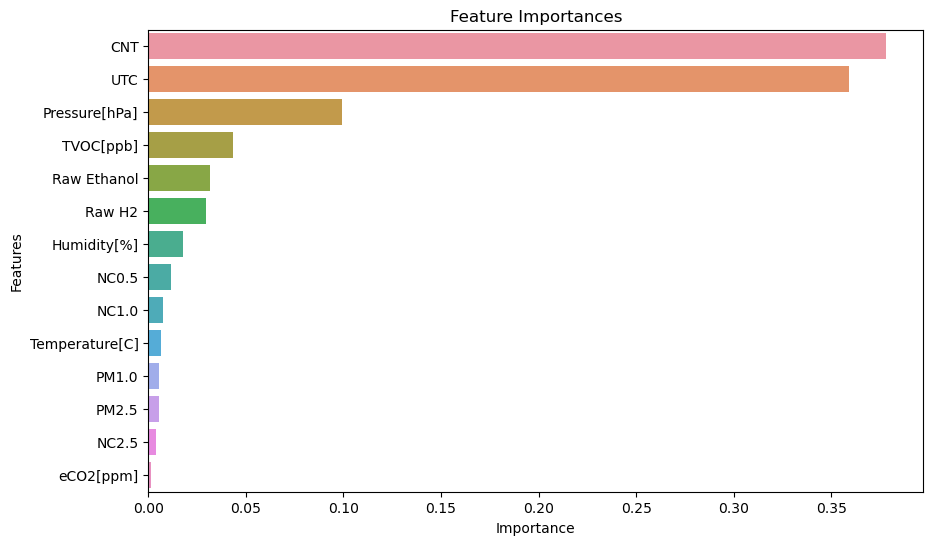

In [48]:
# Sort the feature importances in descending order for better visualization
feature_importances = feature_importances.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()